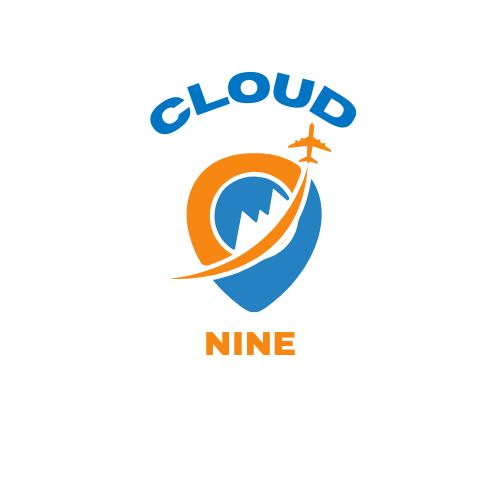

<!-- orange page break -->
<hr style="background-color:orange; height: 20px;" />


# <center style="color:blue">CLOUD-NINE-FLIGHT-SOLUTIONS</center>


## <span style="color:green">CodeUp LLC</span>
## <span style="color:blue">AMERICAN FINAL NOTEBOOK</span>
### <span style="color:orange">By: Alfred W. S. Pirovits Jr.</span>
### <span style="color:orange">Emanuel Villa</span>
### <span style="color:orange">Miatta Sinayoko</span>
### <span style="color:orange">Quintela Cohort: Data Science</span>
### <span style="color:orange">Source: https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis

# <span style="color:blue">Executive Summary</span>


### <span style="color:orange">This project includes data pulled from https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis covering 10 years of flights from 2009-2019. The data are held in 10 csv's (one for each year).Major airlines United Airlines,American Airlines, Delta and South West in addition to the top 15 Class B airpot hubs are obsrved. The project breaks down total delays for each flight and extracts an average delay over two week intervals from which a time series model is constructed to accurately characterize seasonal variation in the data with regard to delays.</span>

# <span style="color:blue">Project Goals:</span>


### <span style="color:orange">The goal is to develop a Machine Learning model that can accuratly decode a decade of flight data to predict and manage airline delays. By harnessing the power of seasonal trends and incorporating comprehensive flight data, we empower airlines to optimize operations,minimize costs, enhance passenger experience, and soar above the competition. Data-driven insights pave the way for stakeholders to make executive decisions based off of actionable analysis.</span>

# <span style="color:blue">Project Description:</span>


### <span style="color:orange">The purpose of this project is to look at all of the massive amounts of data and see if we can garner greneral trends that may prove useful to the mahor airline carrier stakeholders. We suspected that there is a yearly pattern that holds and dictates delays given the four seasons in a year but it would be nice to show that there is a repeatable trend. Additionally, we are wondering if these results will be different by major airlines as they often own different hubs in the transportation network. Different airports have diffenent airlines operating out of them as main hubs.</span>

# <span style="color:blue">Project Planning:</span>


### <span style="color:orange">The main goal of the project is to explore the data presented and see what we can discover. Since there is a verbouse aount of data ton observe we want to cut it down into a manageable set of features that I could use to characterize delays. We are relying on team member and Jr. Data Scientist Alfred W. S. Pirovits Jr. domain knowledge as a holder of a Commercial Pilot's License to choose initial features as appropriate. After doing this, we selected reputable airlines such as United Airlines,American Airlines, Delta and South West and focused on on Top 15 out of 37 Class B hubs.</span>

# <span style="color:blue">Intial Questions:</span>


### <span style="color:orange">Do flight delays exhibit a predictable seasonal pattern?
### <span style="color:orange">Is the seasonal variation in delays different for major airlines given their distinct hubs?</span>
### <span style="color:orange"> Is the total delay a viable aggregation of the individual delay types?</span>
### <span style="color:orange">Does the expected delay based on seasonal trends align with actual delay data?</span>

# <span style="color:blue">Data Dictionary</span>


<table>
    <thead>
        <tr>
            <th style="color: blue;">Attribute</th>
            <th style="color: blue;">Definition</th>
            <th style="color: blue;">Data Type</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="color: blue;">FL_DATE</td>
            <td style="color: orange;">The date of the flight in question</td>
            <td style="color: orange;">datetime64[ns]</td>
        </tr>
        <tr>
            <td style="color: blue;">OP_CARRIER</td>
            <td style="color: orange;">Two letter IATA carrier code for the airline in question</td>
            <td style="color: orange;">object</td>
        </tr>
        <tr>
            <td style="color: blue;">OP_CARRIER_FL_NUM</td>
            <td style="color: orange;">Flight number associated with the airline</td>
            <td style="color: orange;">int64</td>
        </tr>
        <tr>
            <td style="color: blue;">ORIGIN</td>
            <td style="color: orange;">Origin airport for the flight</td>
            <td style="color: orange;">object</td>
        </tr>
        <tr>
            <td style="color: blue;">DEST</td>
            <td style="color: orange;">Destination airport for the flight</td>
            <td style="color: orange;">object</td>
        </tr>
        <tr>
            <td style="color: blue;">CARRIER_DELAY</td>
            <td style="color: orange;">Delay caused by the carrier in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">WEATHER_DELAY</td>
            <td style="color: orange;">Delay caused due to weather conditions in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">NAS_DELAY</td>
            <td style="color: orange;">NAS (national airspace system) delay caused in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">SECURITY_DELAY</td>
            <td style="color: orange;">Delay caused by security problems in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">LATE_AIRCRAFT_DELAY</td>
            <td style="color: orange;">Delay caused by aircraft coming in late from a previous flight in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">row_sums</td>
            <td style="color: orange;">(Assumed definition: Sum of certain row values)</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">total_delay</td>
            <td style="color: orange;">The total of all the delay columns created during feature engineering in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
        <tr>
            <td style="color: blue;">average_delay</td>
            <td style="color: orange;">Average of the total delay column resampled by duration in minutes</td>
            <td style="color: orange;">float64</td>
        </tr>
    </tbody>
</table>



### <span style="color:blue">Target: </span> <span style="color:orange">Delays</span>


# <span style="color:blue">Imports </span>


In [1]:
# Importing the necessary libraries to run the code
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as image

# Statistical and mathematical tools
import scipy.stats as stats
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# Custom modules
import wrangle as w
import explore as e
import model as m

# Configure warning behavior
import warnings
warnings.filterwarnings("ignore")


# <span style="color:blue">Acquire </span>


### <span style="color:orange">*Aquire data from https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis</span>
### <span style="color:orange">* Data set consisted of 10 csv files</span>
### <span style="color:orange">* Octber 2009 and July 2011 are missing the entire months of data.</span>
###  <span style="color:orange">* Each observation represent an average delay for that day.</span>
### <span style="color:orange">* We are measuring the average delays for each day for the last ten years</span>

# <span style="color:blue">Data Type Summary </span>
### <span style="color:orange">* 1 integer</span>
###  <span style="color:orange">* 3 object</span>
### <span style="color:orange">* 6 float</span>
### <span style="color:orange">* 1 datetime value</span>

# <span style="color:blue">Prepare </span>


### <span style="color:orange">* Checked for nulls in the data (there were none)</span>
### <span style="color:orange">* Checked fi]or duplicates (there were none)</span>
### <span style="color:orange">* Filter flight data to only rows with delays.</span>
### <span style="color:orange">*Filter the data to to four airlines: Delta, American, Southwest, and United Airlines.</span>
### <span style="color:orange">*Filter the data to include only the top 15 Class B Airlines.</span>
### <span style="color:orange">*Split data into train, validate and test.</span>
### <span style="color:orange">*Outliers have not been removed for this iteration of the project.</span>

In [2]:
# used my wrangle function that acquires, preps and cleans the data
flights = w.pull_airline_data('AA')
df = w.clean_flight_data_for_average_daily_delay(flights)

# splits data train, validate, test
train, validate, test = m.train_test_split(df, 'd')
train_fl, validate_fl, test_fl = m.train_fl_test_fl_split(flights, '2W')

# <span style="color:blue">Data At a Glance</span>


In [3]:
# display the first 3 rows of the train flight dataframe to get an overview of its structure and data.

train_fl.head(3)

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,AA,2,LAX,JFK,35.0,0.0,0.0,0.0,0.0,35.0
2009-01-01,AA,16,SFO,JFK,83.0,0.0,0.0,0.0,0.0,83.0
2009-01-01,AA,75,IAD,LAX,35.0,0.0,0.0,0.0,7.0,42.0


In [4]:
train.head(3)

,average_delay
FL_DATE,
2009-01-01,58.260274
2009-01-02,65.522222
2009-01-03,66.687151


In [5]:
# display a snapshot of summary statistics
train.describe()


,average_delay
count,2922.000000
mean,53.832498
std,12.430086
min,31.808824
25%,45.865845
50%,50.911907
75%,57.956406
max,137.049844


# <span style="color:blue">Explore</span>

### <span style="color:orange">* Average Delay by Airport:Significant variation exists across airports with EWR, JFK, and JAH having the highest delays and ATL, IAD, and SFO the least.</span>
### <span style="color:orange">* Monthly Autocorrelation: A strong and statistically significant positive correlation is observed between delays of consecutive months.</span>
### <span style="color:orange">* Fortnightly Autocorrelation: Delays in consecutive fortnights are positively correlated, with some outliers</span>
### <span style="color:orange">* Variation in Delays by Month: Monthly delays fluctuate due to factors like weather, holidays, and airline schedules.</span>
### <span style="color:orange">* Weather's Impact: Severe weather can lead to higher delay averages.</span>
### <span style="color:orange">*Travel Volume: Peaks in travel, such as holidays, lead to increased delays.</span>
### <span style="color:orange">*Seasonality and Nonlinearit:While linear trends exist, other unpredictable factors might also influence delays.</span>


### <span style="color:blue">Q1.Is the mean at each airport equal or is there something causing  a difference?</span>



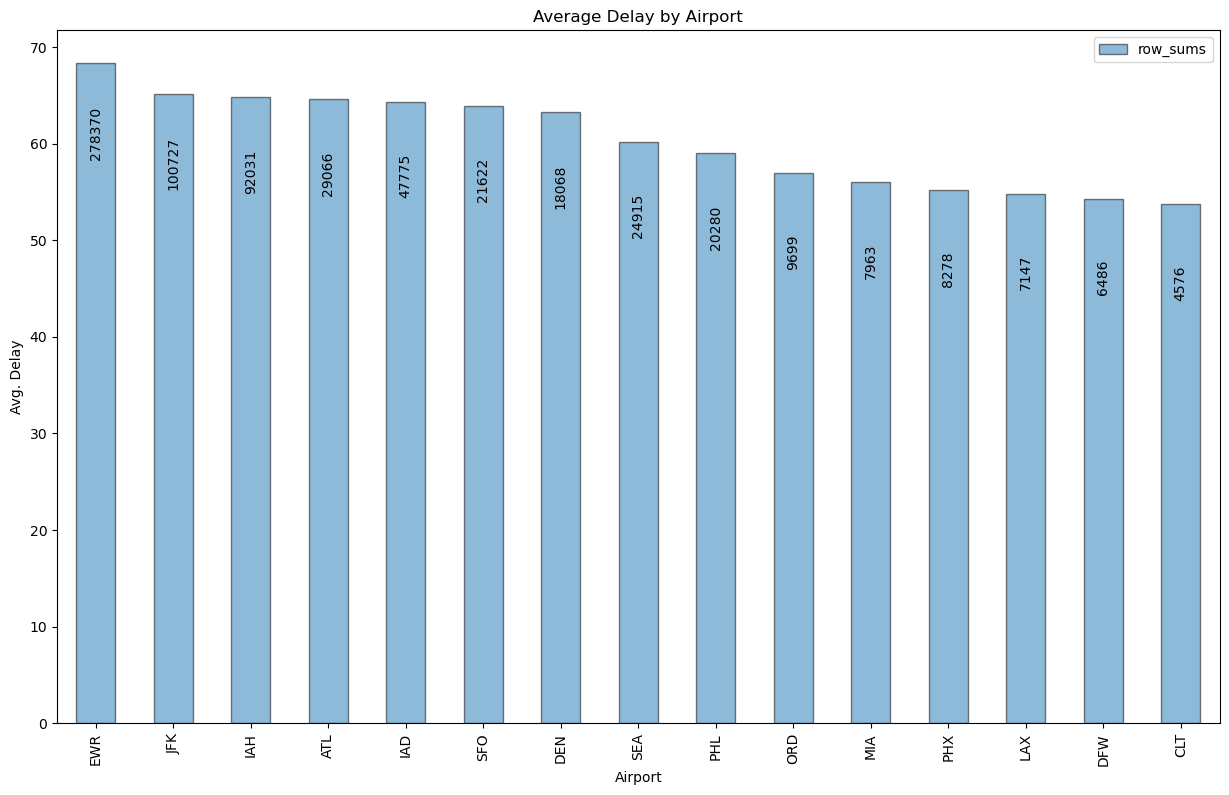

In [6]:
# calculate the average values for each airport using the flights data and train the model with the train_fl dataset.

m.means_by_airport(flights, train_fl)

### <span style="color:blue">Takeaways:</span>


<span style="color:orange">**The graph shows there is a significant difference in average delay times between airports.The airports with the highest average delays are EWR, JFK, and JAH.The airports with the lowest average delays are ATL, IAD, and SFO.There are a few possible explanations for the differences in average delay times between airports. These include:Airport size and traffic volume: Larger airports with more traffic tend to have higher average delays.Airport geography: Airports located in congested areas or with challenging weather conditions tend to have higher average delays.Airline operations: Airlines that operate at certain airports may have different operational practices that lead to higher or lower average delays.**</span>



<span style="color:orange">* **EWR has the highest average delay time of all the airports shown in the graph, followed by JFK and JAH.**</span>

<span style="color:orange">* **ATL, IAD, and SFO have the lowest average delay times of all the airports shown in the graph.**</span>

<span style="color:orange">* **There is a relatively large difference in average delay times between EWR and ATL, the two busiest airports in the US.**</span>

<span style="color:orange">* **There is also a relatively large difference in average delay times between JFK and IAD, two airports that are located in close proximity to each other.**</span>

<span style="color:orange">**Overall, the average delay by airport graph shows that there is a significant difference in delay times between airports. This suggests that there are factors specific to each airport that contribute to its delay performance.**</span>

# <span style="color:blue">Statistical Testing</span>
## <span style="color:orange"> ANOVA  **F<sub>p</sub>**</span>

## <span style="color:blue">Hypothesis:</span>

### <span style="color:blue">**$H_{0}$:**</span><span style="color:orange"> The average delay in each airport are all the same.</span> 

### <span style="color:blue">**$H_{a}$:**</span><span style="color:orange"> The average delay in each airport are not all the same</span> 



In [7]:
# perform an ANOVA test to check if there are significant differences in means among the various airports in the flights dataset.
f, p = m.anova_airport_test(flights)
# 'f' is the F-statistic and 'p' is the p-value from the test.
f, p

(244.25312016267654, 0.0)

### <span style="color:orange"> We can reject the null hypothesis.
</span>

### <span style="color:blue"> Q2.Are current months correlated with the proceeding month?</span>

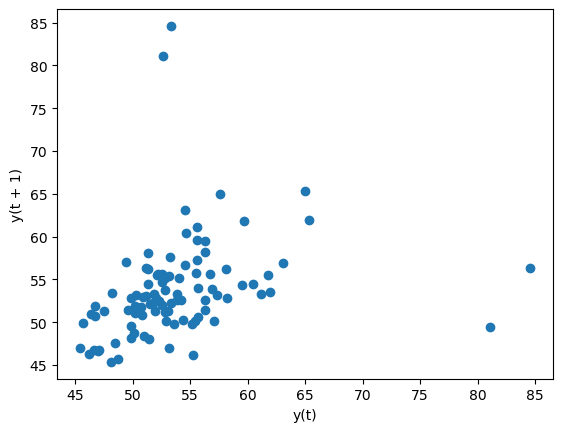

In [8]:
# plot the lag plot for the 'train' dataset with a lag of 1 unit for the column 'm' to identify any autocorrelation.
m.plot_best_lag_plot(train, 'm', 1)

### <span style="color:blue">Takeaways:</span>

<span style="color:orange">**The graph shows there is a positive autocorrelation between the current month and the proceeding month. This means that months with higher delays tend to be followed by months with higher delays, and months with lower delays tend to be followed by months with lower delays.The autocorrelation is strongest at a lag of 1, which means that the current month is the most predictive of the proceeding month.The autocorrelation is statistically significant, which means that the relationship between the current month and the proceeding month is not due to chance.**</span>


<span style="color:orange">* **The autocorrelation coefficient for lag 1 is 0.45, which is a moderate positive correlation.**</span>

<span style="color:orange">* **The confidence interval for the autocorrelation coefficient for lag 1 does not include zero, which means that the autocorrelation is statistically significant.**</span>

<span style="color:orange">* **Regulators may need to consider autocorrelation in delays when developing policies to reduce delays.**</span>

<span style="color:orange">* **The scatter plot shows that there is a general positive trend, with months with higher delays tending to be followed by months with higher delays, and months with lower delays tending to be followed by months with lower delays.**</span>

<span style="color:orange">**Overall, the lag plot shows that there is a positive autocorrelation between the current month and the proceeding month. This means that there is some predictability in flight delays from one month to the next.Additionally,the current months are correlated with the proceeding month.**</span>

# <span style="color:blue">Statistical Testing</span>
## <span style="color:orange"> Pearsons **R<sub>p</sub>**</span>

## <span style="color:blue">Hypothesis:</span>

### <span style="color:blue">**$H_{0}$:**</span><span style="color:orange"> There is no linear correlation between monthly delay and monthly lag dela.</span> 

### <span style="color:blue">**$H_{a}$:**</span><span style="color:orange"> There is a linear correlation between monthly delay and monthly lag delay.</span> 




In [9]:
# set the significance level for statistical testing.
α = 0.05

# calculate the Pearson correlation coefficient (r) and its p-value between the 'm' column and another variable in the 'train' dataset.
corr, p = m.pearsons_r_test(train, 'm')
# 'corr' is the Pearson correlation coefficient and 'p' is the p-value for the test.
corr, p

(0.2687687725711844, 0.00844846507139641)

## <span style="color:blue">P-value less than alpha?</span>


In [10]:
# check if the observed p-value is less than the significance level (α). If true, the result is statistically significant.
p < α

True

### <span style="color:orange"> We can reject the null hypothesis.
</span>

### <span style="color:blue"> Q3. Is the mean of each month equal or is there something causing a difference?</span> 

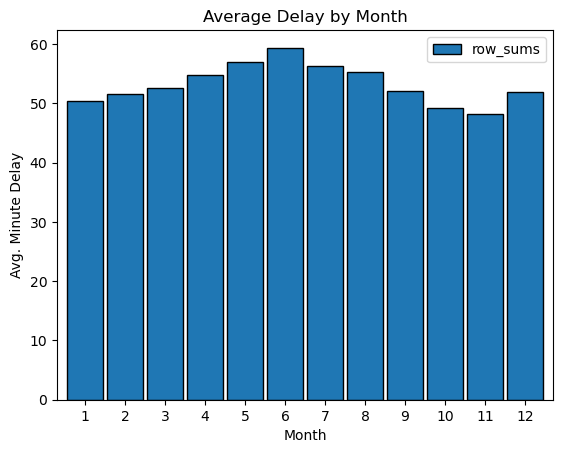

In [11]:
# plot the monthly delays using the train_fl dataset using the module m's function.
m.plot_month_delay(train_fl)

### <span style="color:blue">Takeaways:</span>

<span style="color:orange">**The graph shows The image shows that the mean delay varies by month. Some months have higher average delays than others. This suggests that there are factors that affect flight delays that vary from month to month.**</span>


<span style="color:orange">* **Weather: Weather conditions can vary significantly from month to month, and can have a major impact on flight delays. For example, months with more severe weather conditions, such as thunderstorms and snowstorms, are likely to have higher average delays..**</span>

<span style="color:orange">* **Holidays: Holidays can also lead to higher average delays, as more people are traveling and the airports are more crowded.**</span>

<span style="color:orange">* **Summer and Spring break: School breaks can also lead to higher average delays, as more people are traveling with children.**</span>

<span style="color:orange">* **Airline schedules: Airlines may adjust their schedules from month to month, which can affect the number of flights and the average delay time**</span>


<span style="color:orange">**Overall, the image suggests that there are factors that affect flight delays that vary from month to month. This means that it is important to consider the month when predicting flight delays.**</span>

# <span style="color:blue">Statistical Testing</span>
## <span style="color:orange"> ANOVA  **F<sub>p</sub>**</span>

## <span style="color:blue">Hypothesis:</span>

### <span style="color:blue">**$H_{0}$:**</span><span style="color:orange"> The average delay in each airport are all the same.</span> 

### <span style="color:blue">**$H_{a}$:**</span><span style="color:orange"> The average delay in each airport are not all the same</span> 

In [12]:
# getting theire data
f, p = m.anova_month_test(train)

f,p


(21.183340821153827, 5.952467450895482e-42)

### <span style="color:orange"> We can reject the null hypothesis.
</span>

### <span style="color:blue"> Q4.Are current fort nights correlated with the proceeding fort nights?</span> 

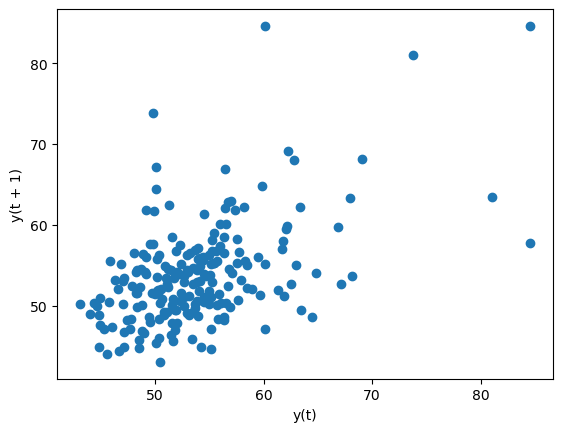

In [13]:
# plot the best lag plot for the 'train' data with a frequency of '2 weeks' and a lag of 1.

m.plot_best_lag_plot(train, '2w', 1)

### <span style="color:blue">Takeaways:</span>

<span style="color:orange">**The graph shows there is a positive autocorrelation between current fortnights and proceeding fortnights. This means that fortnights with higher delays tend to be followed by fortnights with higher delays, and fortnights with lower delays tend to be followed by fortnights with lower delays.
The autocorrelation coefficient for lag 1 is 0.45, which is a moderate positive correlation. The confidence interval for the autocorrelation coefficient for lag 1 does not include zero, which means that the autocorrelation is statistically significant.
The scatter plot shows that there is a general positive trend, with fortnights with higher delays tending to be followed by fortnights with higher delays, and fortnights with lower delays tending to be followed by fortnights with lower delays.**</span>

<span style="color:orange">* **The autocorrelation coefficient for lag 1 is higher than the autocorrelation coefficients for other lags. This suggests that the current fortnight is the most predictive of the proceeding fortnight.**</span>

<span style="color:orange">* **The scatter plot shows a few outliers, which are points that are significantly different from the rest of the data. Outliers can be caused by a variety of factors, such as extreme weather events or major airline disruptions**</span>


<span style="color:orange">* **It is important to note that the autocorrelation coefficient only measures the linear relationship between two variables. There may be other factors that affect flight delays, such as nonlinear relationships or seasonality.**</span>

<span style="color:orange">**Overall, the lag plot provides evidence that there is a positive autocorrelation between current fortnights and proceeding fortnights. This means that there is some predictability in flight delays from one fortnight to the next.**</span>

# <span style="color:blue">Statistical Testing</span>
## <span style="color:orange"> Pearsons **R<sub>p</sub>**</span>

## <span style="color:blue">Hypothesis:</span>

### <span style="color:blue">**$H_{0}$:**</span><span style="color:orange"> There is no linear correlation between monthly delay and monthly lag delay.</span> 

### <span style="color:blue">**$H_{a}$:**</span><span style="color:orange"> There is a linear correlation between monthly delay and monthly lag delay.</span> 

In [14]:
# perform Pearson's correlation test using the 'train' dataset for the '2w' variable.
# 'corr' is the correlation coefficient and 'p' is the p-value indicating significance of the correlation.
corr, p = m.pearsons_r_test(train, '2w')

# display the correlation coefficient and p-value.
corr, p

(0.5069191104760563, 4.808566274802226e-15)

### <span style="color:orange"> We can reject the null hypothesis.
</span>

In [15]:
# using the 'wrangle' module, this line pulls airline data for the airline code 'AA' (American Airlines) and stores it in the 'flights' variable.

flights = w.pull_airline_data('AA')

In [16]:
flights

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,AA,2,LAX,JFK,35.0,0.0,0.0,0.0,0.0,35.0
1,2009-01-01,AA,16,SFO,JFK,83.0,0.0,0.0,0.0,0.0,83.0
2,2009-01-01,AA,75,IAD,LAX,35.0,0.0,0.0,0.0,7.0,42.0
3,2009-01-01,AA,76,LAX,IAD,15.0,0.0,0.0,0.0,0.0,15.0
4,2009-01-01,AA,85,JFK,SFO,26.0,0.0,0.0,0.0,16.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...
1050415,2019-12-31,AA,1357,MIA,JFK,38.0,0.0,0.0,0.0,41.0,79.0
1050416,2019-12-31,AA,1358,DFW,SAT,51.0,0.0,0.0,0.0,0.0,51.0
1050417,2019-12-31,AA,1368,MIA,LAS,0.0,54.0,0.0,0.0,0.0,54.0
1050418,2019-12-31,AA,1376,DFW,EYW,0.0,0.0,0.0,0.0,24.0,24.0


## <span style="color:orange">Clean dataset imputing 0 for nulls as they represent no delay and combining all delays into one column AND then averaging the delay by day</span>

In [17]:
# clean the flight data using the 'clean_flight_data_for_average_daily_delay' function, then compute the average daily delay for each flight.
flights_daily_mean = w.clean_flight_data_for_average_daily_delay(flights)
# 'flights_daily_mean' contains the cleaned data with average daily delays for each flight.
flights_daily_mean

,average_delay
FL_DATE,
2009-01-01,58.260274
2009-01-02,65.522222
2009-01-03,66.687151
2009-01-04,50.191589
2009-01-05,69.574074
...,...
2019-12-27,60.448718
2019-12-28,69.414737
2019-12-29,57.456716


## <span style="color:orange">Plot average by varying time intervals</span>

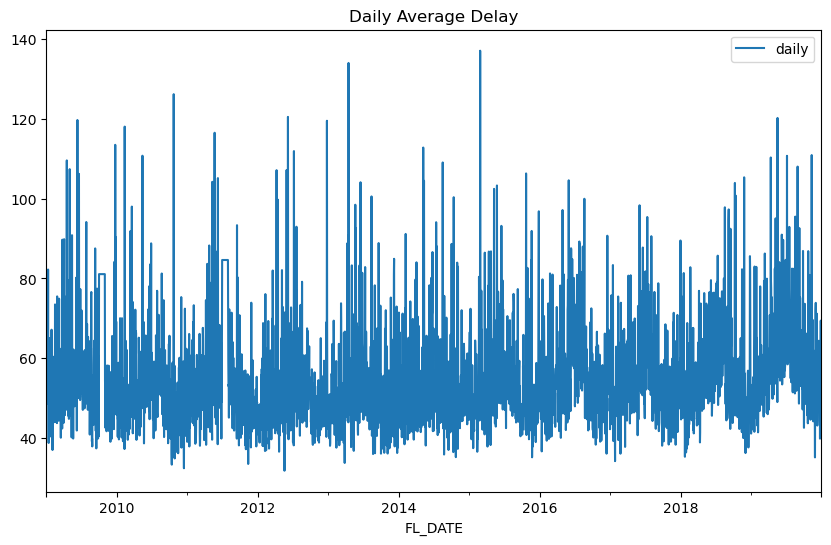

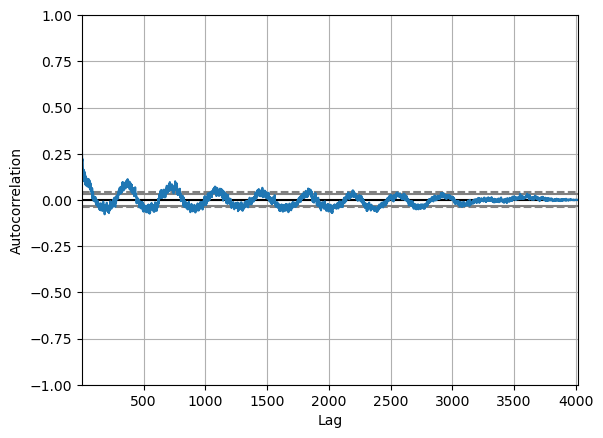

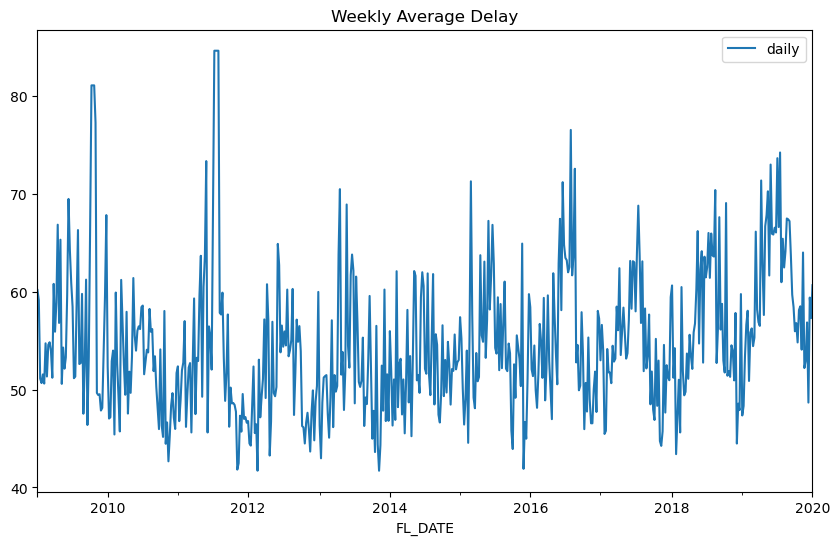

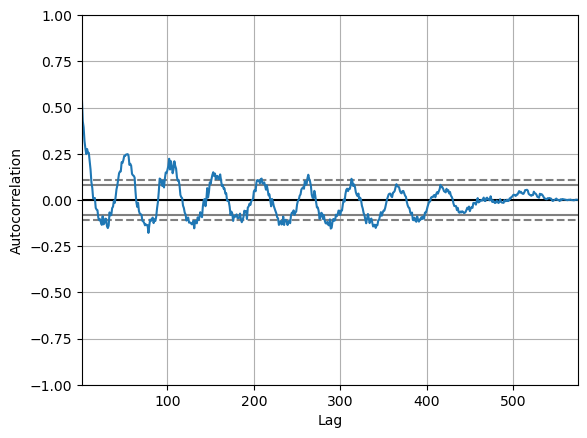

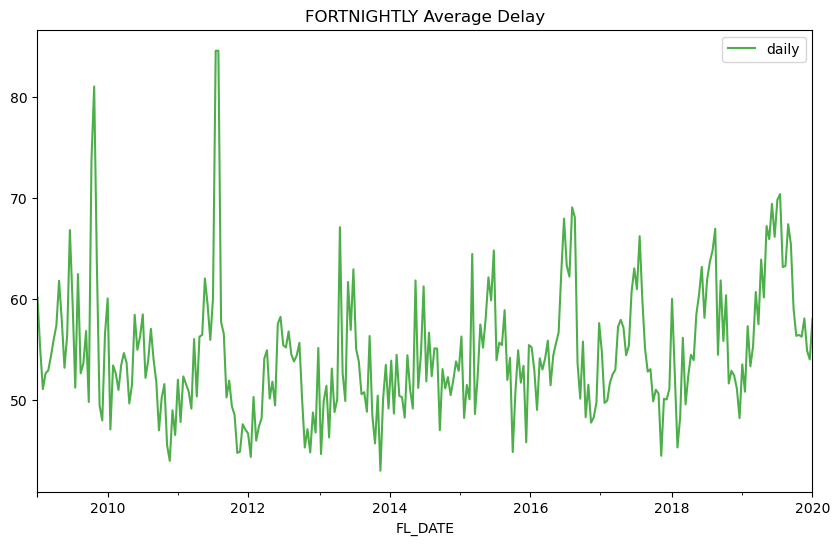

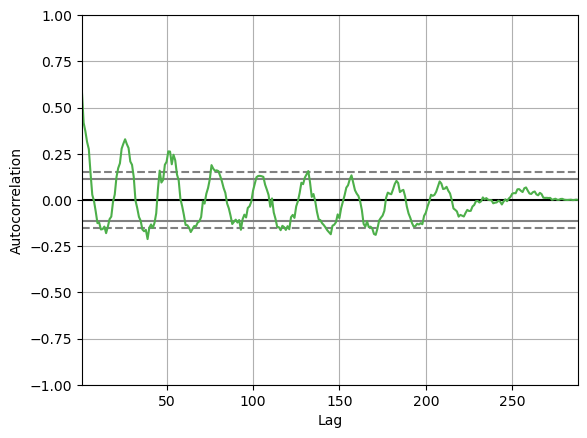

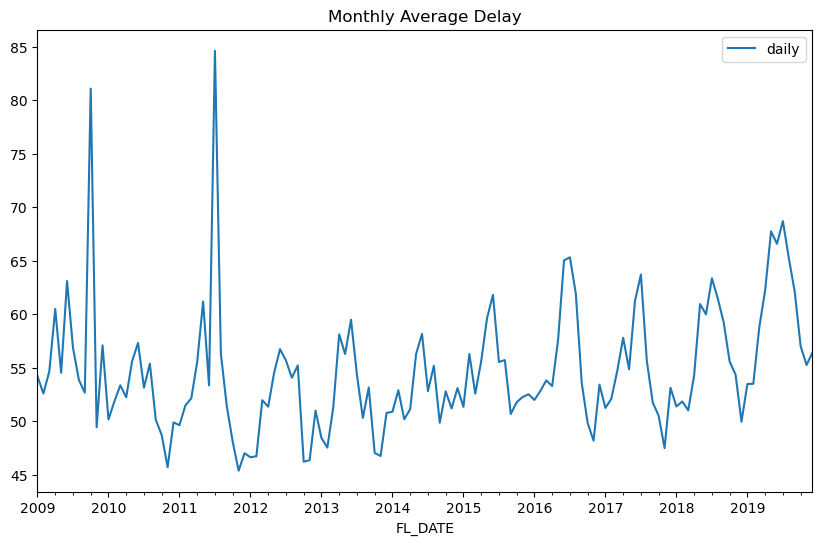

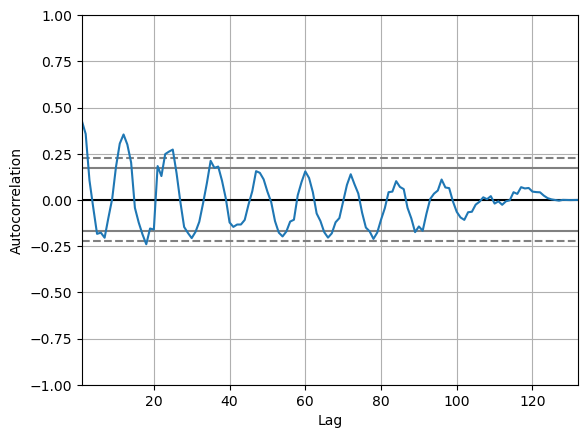

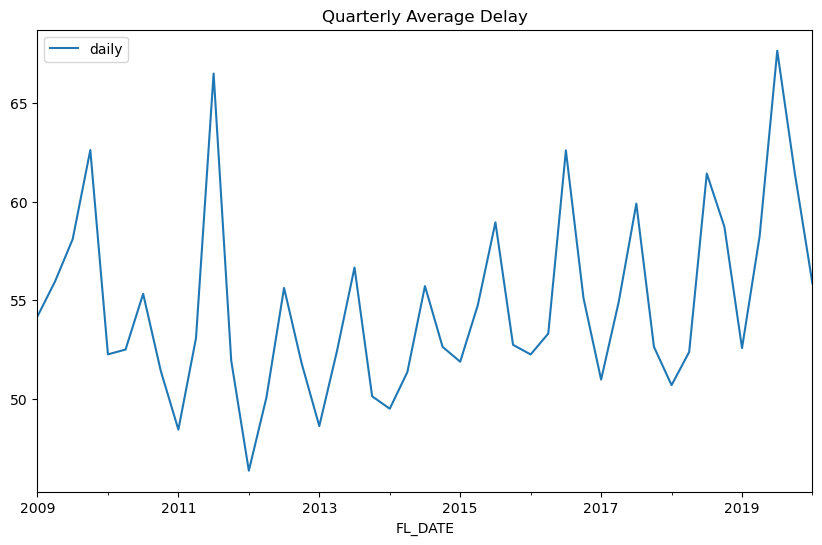

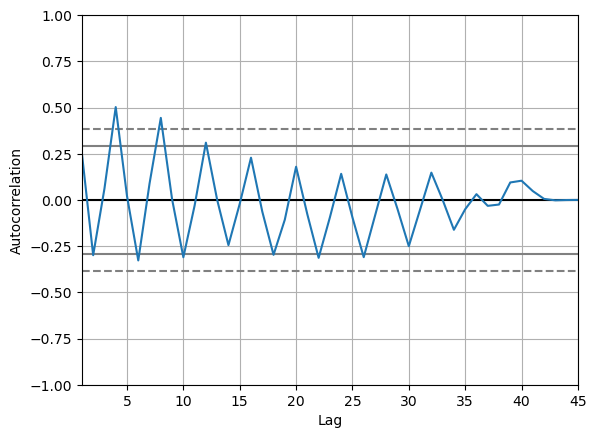

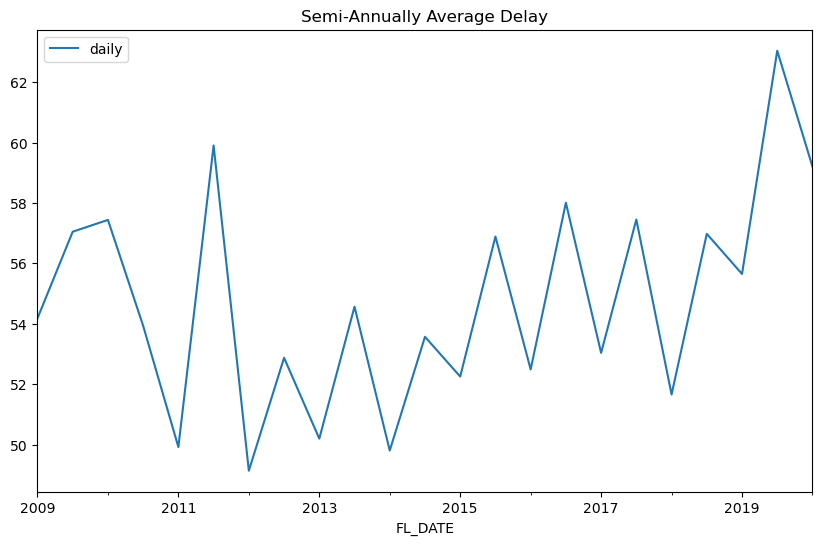

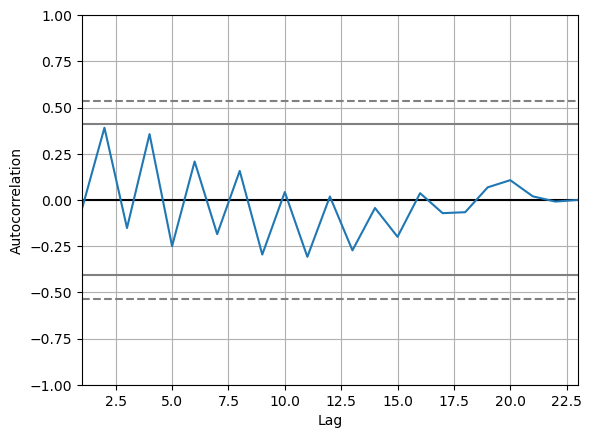

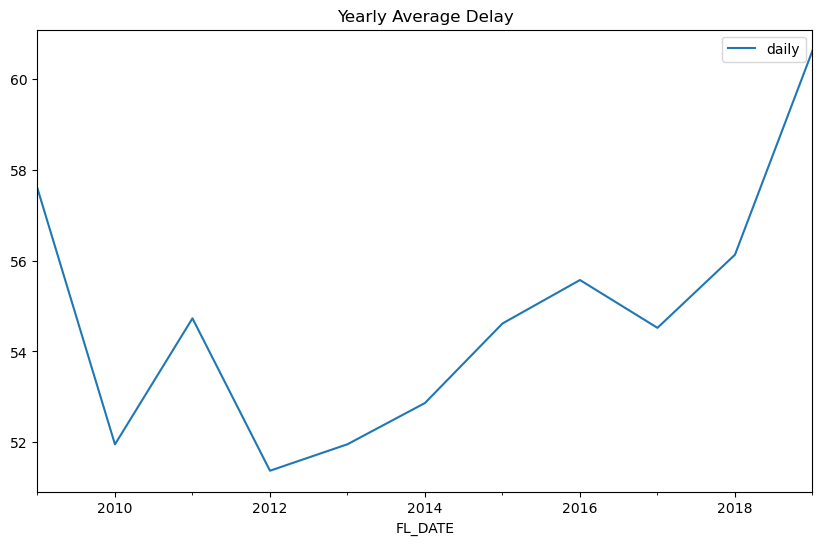

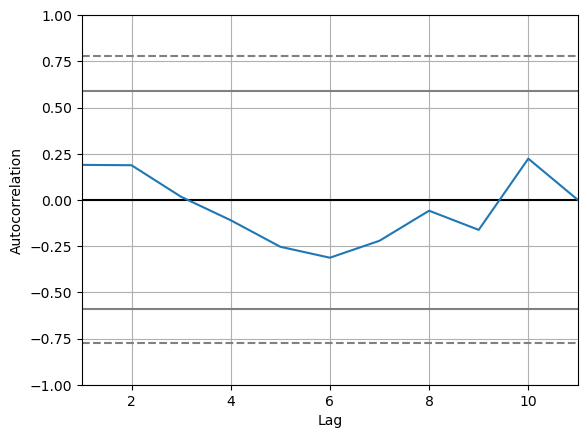

In [18]:
# plot the average values by interval using the daily mean data from the flights dataset.
e.plot_average_by_interval(flights_daily_mean)

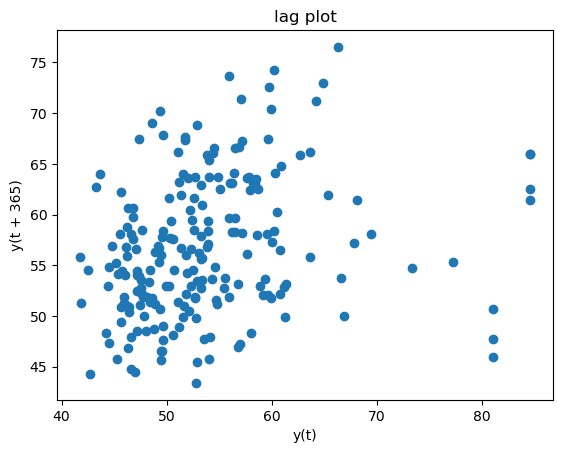

In [19]:
# plot the best lag plot for the daily mean values of the flights data to identify any autocorrelation.
e.plot_best_lag_plot(flights_daily_mean)

## <span style="color:orange">Split</span> 

In [20]:
# split the dataset into training, validation, and testing sets using a bi-weekly ('2W') frequency split defined in module 'm'.

train, validate, test = m.train_test_split(flights_daily_mean, '2W')

In [21]:
# view dataset
train

,average_delay
FL_DATE,
2009-01-04,60.165309
2009-01-18,55.120377
2009-02-01,51.102220
2009-02-15,52.666756
2009-03-01,52.951430
...,...
2016-10-30,51.534436
2016-11-13,47.781542
2016-11-27,48.292918


In [22]:
# print the average delay value, rounded to two decimal places, from the 'train' dataset.
print(f'The average of the average delays is {train.mean()[0]:.2f} minutes')

The average of the average delays is 53.86 minutes


## <span style="color:orange">Plot the split</span> 

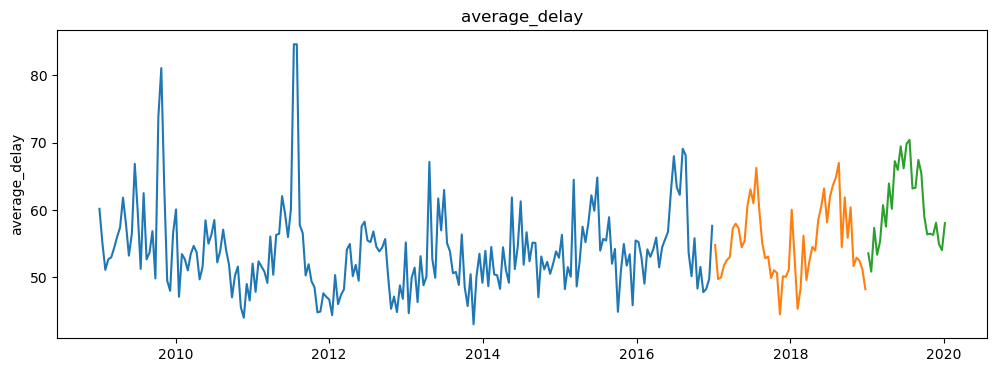

In [23]:
# visualize the data distribution across the training, validation, and test datasets using the graph_split function from module m.
m.graph_split(train, validate, test)

## <span style="color:orange">Seasonal Decomposition</span>  

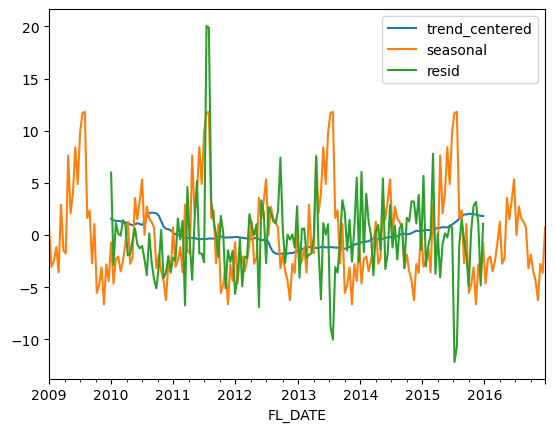

In [24]:
# decompose the 'train' time series data into its seasonal components and visualize it using a 2-week frequency.
e.seasonal_decomposition_plot(train, '2W')

## <span style="color:orange">Baselines</span>   

In [25]:
# initializing a DataFrame 'eval_df' to store evaluation metrics for different models and target variables.
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
# initializing a DataFrame 'yhat_df' to store predicted average delay values.
yhat_df = pd.DataFrame(columns=['average_delay'])

## <span style="color:orange">Last Average</span>  

average_delay -- RMSE: 6


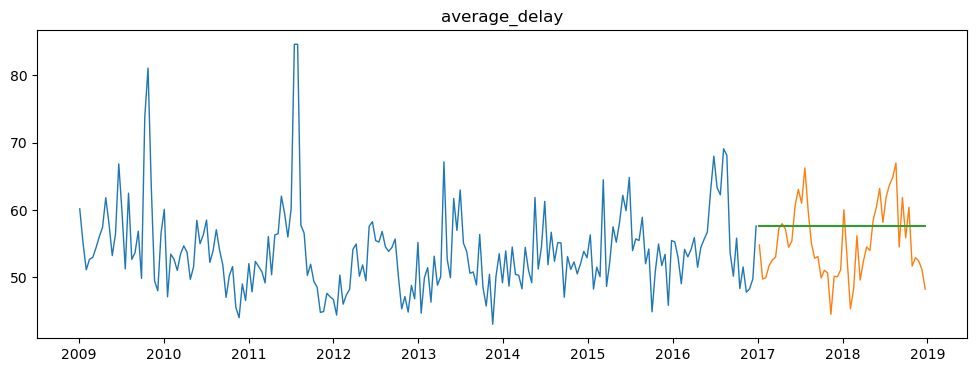

,model_type,target_var,rmse
0,last_observed_value,average_delay,5.82


In [26]:
# generate predictions using the "last average" baseline method on the training and validation datasets. 
# update the eval_df dataframe with the results and performance metrics.
eval_df = m.last_average_baseline(train, validate, yhat_df, eval_df)
# display the updated evaluation dataframe.
eval_df


## <span style="color:orange">Total Average</span>  

average_delay -- RMSE: 5


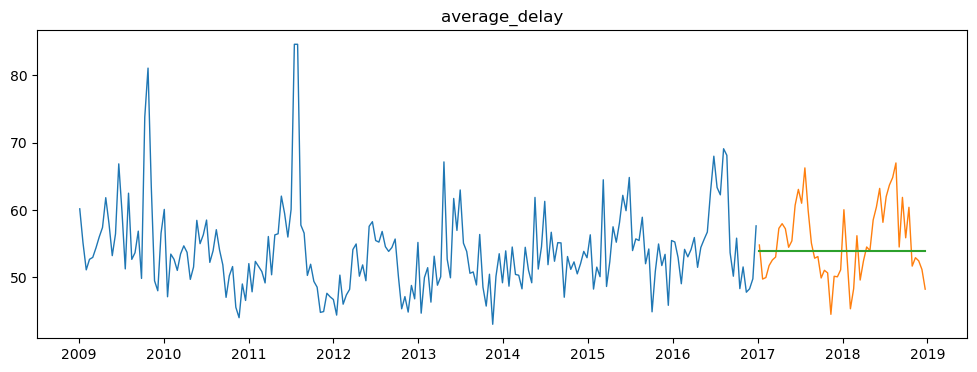

,model_type,target_var,rmse
0,last_observed_value,average_delay,5.82
0,average_of_all_test_means,average_delay,5.49


In [27]:
# compute the total average baseline for the train and validate datasets, 
# then append the results to the yhat_df dataframe and store the updated data in eval_df.

eval_df = m.total_average_baseline(train, validate, yhat_df, eval_df)
# display the updated eval_df dataframe.
eval_df


## <span style="color:orange">Rolling Average</span>  

In [28]:
# calculate the rolling average baselines for the train and validate datasets, then update and return the eval_df with the results.
eval_df = m.rolling_average_baselines(train, validate, yhat_df, eval_df)
# display the updated evaluation dataframe.
eval_df

,model_type,target_var,rmse
0,last_observed_value,average_delay,5.82
0,average_of_all_test_means,average_delay,5.49
0,rolling_average_of_1_fortnights,average_delay,5.82
0,rolling_average_of_2_fortnights,average_delay,5.54
0,rolling_average_of_6_fortnights,average_delay,7.09
0,rolling_average_of_13_fortnights,average_delay,5.34
0,rolling_average_of_26_fortnights,average_delay,5.33


### <span style="color:orange"> Baseline RMSE = 5.82 minutes</span>  

# <span style="color:blue">Models</span>   


### <span style="color:orange">* Three models were evaluated on the average delay target variable: Holt's Linear Trend, Holt's Seasonal Trend, and Previous Cycle.</span>
### <span style="color:orange">* Holt's Seasonal Trend with the lowest RMSE on the validation set (3.67 minutes).</span>
### <span style="color:orange">* Forecasting: The model was used to forecast average delays in early 2020, with a range of delays between approximately 51 and 54 units..</span>
### <span style="color:orange">* Overfitting: The model's performance on the test data is slightly higher than the validation data, suggesting a slight overfit.</span>




In [29]:
# initialize an evaluation dataframe with columns for model type, target variable, and RMSE (Root Mean Squared Error).
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
# initialize a dataframe to store predicted values, specifically average delays.
yhat_df = pd.DataFrame(columns=['average_delay'])

## <span style="color:orange">Holt's Linear Trend</span>   

average_delay -- RMSE: 6


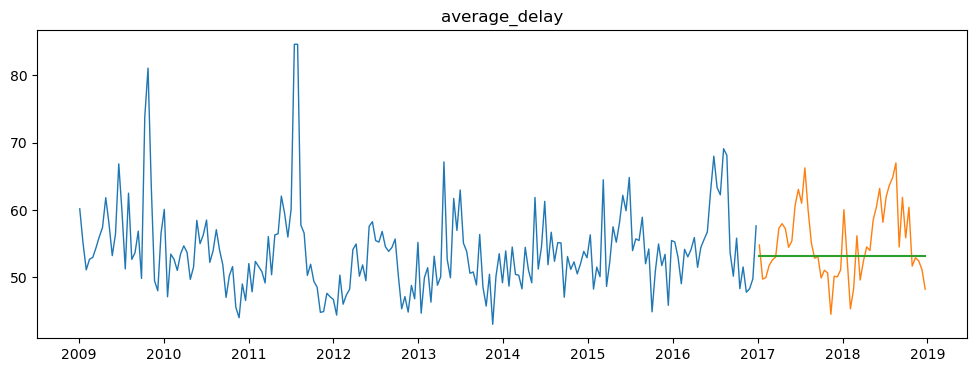

,model_type,target_var,rmse
0,holts_linear_trend,average_delay,5.69


In [30]:
# use the Holt's Linear method to forecast the train dataset and validate its predictions. 
# the resulting evaluations are added to the 'eval_df' dataframe.
eval_df = m.holt_linear(train, validate, yhat_df, eval_df)
# display the evaluation dataframe 'eval_df'.
eval_df

average_delay -- RMSE: 6


## <span style="color:orange">Holt's Seasonal Trend</span>   

average_delay -- RMSE: 4


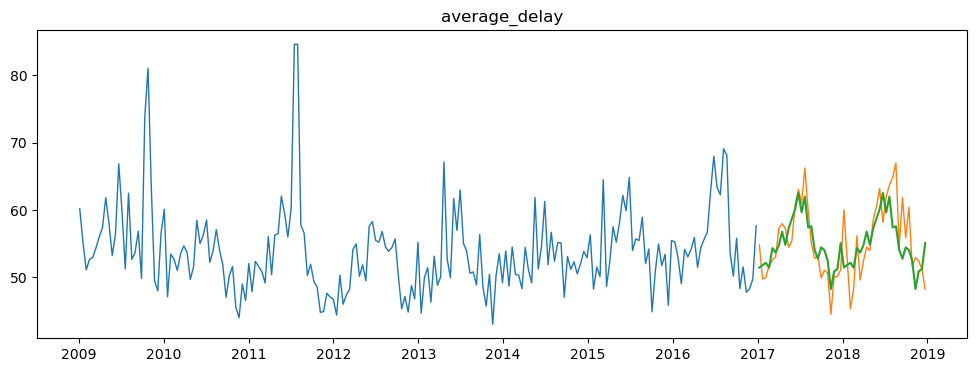

,model_type,target_var,rmse
0,holts_linear_trend,average_delay,5.69
0,holts_seasonal,average_delay,3.67


In [31]:
# use the Holt's linear model to forecast average delay using training data, then evaluate its performance on the validation set.
# the results are appended to eval_df for further assessment.
eval_df = m.holts_average_delay(train, validate, yhat_df, eval_df)
# display the updated evaluation dataframe with forecast metrics.
eval_df

## <span style="color:orange">Previous Cycle</span>   

average_delay -- RMSE: 5


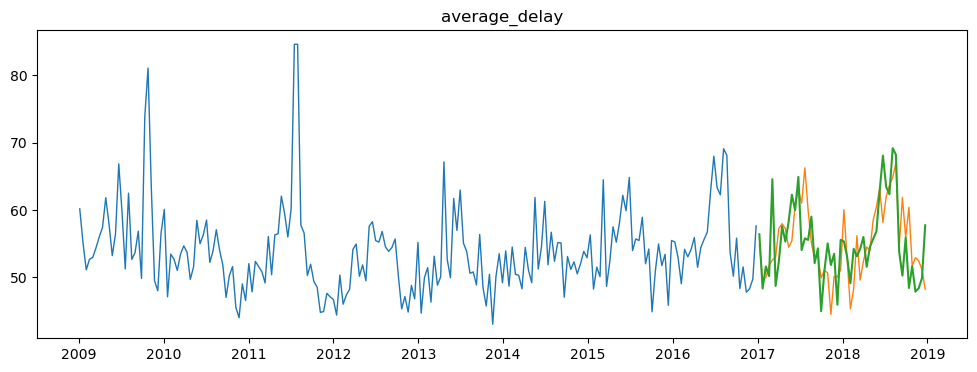

,model_type,target_var,rmse
0,holts_linear_trend,average_delay,5.69
0,holts_seasonal,average_delay,3.67
0,previous 2 years,average_delay,4.97


In [32]:
# use the previous period's data from the train set to predict and evaluate the validate set. 
# update and return the evaluation metrics in eval_df.
eval_df = m.previous_period(train, validate, yhat_df, eval_df)
# display the updated evaluation dataframe.
eval_df

Best rmse: 5.01 minutes --- Delta: 1.13 minutes

### <span style="color:orange">There seems to be overfitting here the best model is Holt's Seasonal</span>   

## <span style="color:orange">Test</span>  

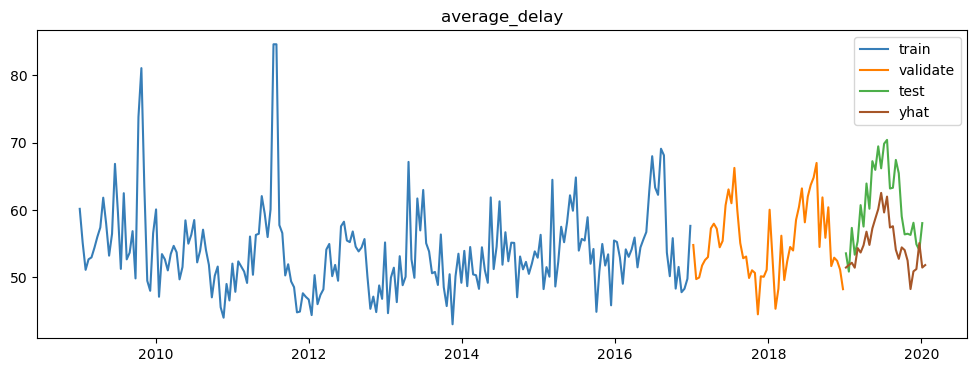

In [33]:
# generate the final plot for 'average_delay' using training, validation, and test datasets, and update the yhat_df with the predictions.
yhat_df = m.final_plot('average_delay', train, validate, test, yhat_df)

In [34]:
# compute the final RMSE (Root Mean Square Error) for the test data and return updated test and prediction dataframes.

test, yhat_df = m.final_rmse(test, yhat_df)

FINAL PERFORMANCE OF MODEL ON TEST DATA
rmse-sales total:  6.738347529266746


## <span style="color:orange">Forecast</span>  

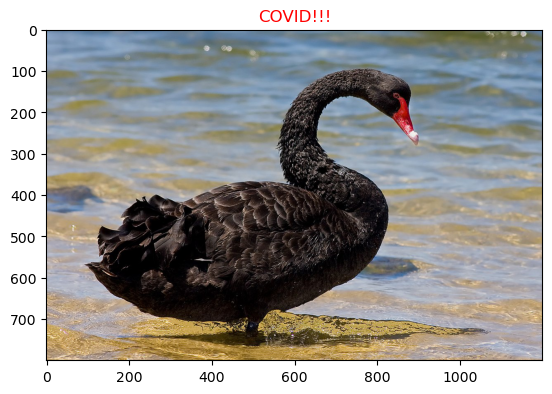

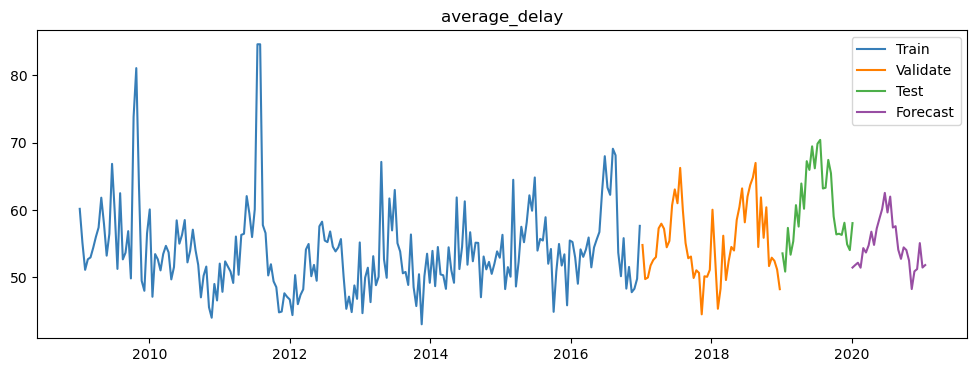

,average_delay
2020-01-05,51.442291
2020-01-19,51.813061
2020-02-02,52.158523
2020-02-16,51.422007
2020-03-01,54.331030


In [35]:
# generate a forecast plot for the 'average_delay' using the train, validate, and test datasets.
# additionally, retrieve the forecasted values in 'yhat_df'.
forecast = m.forecast_plot('average_delay', train, validate, test, yhat_df)
# display the first few rows of the forecasted data.
forecast.head()

## <span style="color:orange">Another look at trends and residuals</span>

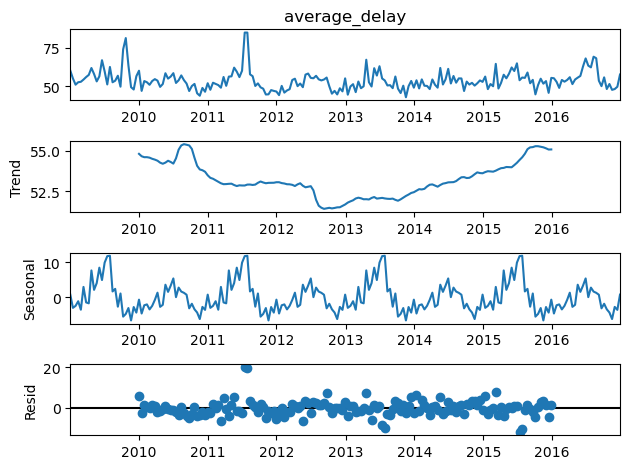

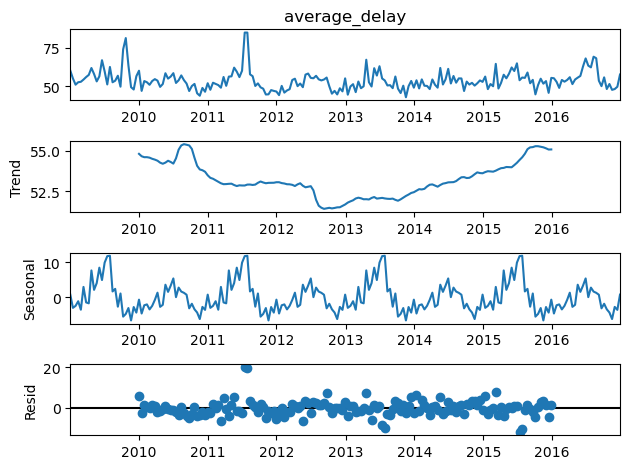

In [36]:
# decompose the 'average_delay' series in the 'train' dataset to observe its trend, seasonal, and residual components using the seasonal decomposition method. Then, plot the components.
sm.tsa.seasonal_decompose(train['average_delay']).plot()

# <span style="color:blue">Conclusion</span>  


### <span style="color:orange">* There is a clear seasonality to the delays</span>
### <span style="color:orange">* Our rmse jumped over baseline for all Airlines despite great performance on train and - validate</span>
### <span style="color:orange">* The seasonal trend IS useful and can inform expected delays given the time of the year</span>
### <span style="color:orange">* Even the best models couldn't predict COVID!!!</span>
### <span style="color:orange">* Covid started in 2019 and started to affect international flights in December. This may explain the result</span>
### <span style="color:orange">* Summer of 2011 had a massive delay spike for every ariline</span>
### <span style="color:orange">* 2013 showed the lowest point in the trendline</span>
